<a href="https://colab.research.google.com/github/Calm-leon/proyecto-an-lisis-de-datos/blob/main/Puchamon_final_PTMx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos del Proyecto de Ciencia de Datos: Análisis de Pokémon Legendario.

---------------
## Contexto
---------------

Dentro del Mundo Pokémon, se considera legendario aquel Pokémon generalmente raro, con poderes sobrenaturales y que destacan sobre el resto. La mayoría de estos Pokémon forman parte del proceso de creación del Mundo y han intervenido de una u otra manera en él. Así mismo, suelen ser realmente difíciles de avistar y mucho más todavía de capturar; pues raramente se muestran ante los humanos.  

Hace un tiempo se recolectaron los datos de las estadisticas de los 802 pokemones conocidos en ese entonces.


-----------------
## Objectivo
-----------------

Analizar las habilidades con las que debe contar un Pokémon para que sea considerado legendario. 
Existen pokemones que se comparan a la fuerza de los pokemones legendarios pero ¿Por qué estos no son legendarios?.


## P 1: Importación de bibliotecas a usar.

In [124]:
import numpy as np # Crea arreglos de grandes dimensiones y contiene funciones matemátematicas de alto nivel. 
import pandas as pd # Nos facilita la manipulación, tratamiento y análisis de los datos.
import seaborn as sns # Visualización de los datos.
import matplotlib.pyplot as plt # Trazado para graficos en dos dimenciones.
from matplotlib.ticker import PercentFormatter # Da formato de porcentajes a los graficos.
import scipy.stats as stats # Distribuciones estadisticas y .stats se utiliza para analizar la distribución normal.
%matplotlib inline 

## Respuesta 1:

- **NumPy** es una librería esencial para el análisis de datos y el cálculo científico. Hace arreglos manipulables de grandes dimensiones y contiene un gran número de funciones matemátematicas de alto nivel.
Suele importarse con el alias np de la siguiente forma: `import numpy as np`. 

- **Pandas** es la librería más utilizada para el análisis, tratamiento (leer y escribir datos en diferentes formatos) y manipulación de datos, sus estructuras básicas son marcos de datos y series. Se basa en NumPy y generalmente se importa con el alias pd como `import pandas as pd`.

- **Seaborn** es una librería que funciona como una interfaz para Matplotlib y está integrada con pandas. Se utiliza para la visualización de datos con la creación de trazados estadiaticos. Se importa normalmente con el alias sns de la siguiente forma: `import seaborn as sns`. 

- **Matplotlib** es una librería para crear diagramas matemáticos, estadísticos y científicos. La colección matplotlib.pyplot emula la forma de hacer las cosas de Matlab. Se importa con el alias plt como `import matplotlib.pyplot as plt` y el comando `%matplotlib inline` muestra los gráficos dentro del cuaderno Jupyter.

- **Scipy.stats**

In [125]:
#Abrimos la base de datos que nos ha proporcionado el Profesor Oak.
Puchamon =  pd.read_csv("https://raw.githubusercontent.com/Calm-leon/proyecto-an-lisis-de-datos/main/Puchamon.csv")
Puchamon

,Unnamed: 0,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,797,798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,0
798,798,799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1
799,799,800,Necrozma,107,101,2.4,97,NaN,127,89,79,psychic,230.0,7,1
800,800,801,Magearna,95,115,1.0,80,NaN,130,115,65,steel,80.5,7,1


-------------------------
## Diccionaro del Conjunto de Datos según la Pokedex.
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del Pokémon en la enciclopedia *Pokedex*.
* name: Nombre de la especie del Pokémon según su evolución.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que mantiene el Pokémon al recibir un ataque.
* height_m: Altura de la especie del Pokémon según su evolución (m).
* hp: Puntos de vida.
* percentage_male: Porcentaje que regula la probabilidad de que al nacer el Pokémon sea de género masculino.
* sp_attack: Representa la velocidad con la que el Pokémon da un ataque. 
* sp_defense: Representa la velocidad con la que el Pokémon anula los puntos de vida del ataque enemigo.
* speed: Representa la velocidad con la que el Pokémon se desplaza en combate. 
* type: Tipo de Pokémon. 
* weight_kg: Peso del Pokémon (kg). 
* generation: Cada que hay una gran ola de nuevos Pokemones la "Pokedex" es actualizada. La generación indica en qué actualización se incorpora cada Pokémon.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

## P2: ¿Qué series no son imprecindibles para determinar si un Pokémon es legendario o no?.

## Respuesta 2:

La información proporcionada en las series de *percentage_male*,*type* y *generation* no nos suministran ningún dato relevante para indagar si un Pokémon es legendario o no, teniendo en cuenta que a los Pokemones no los hace legendarios su género ni su tipo. Adicionalmente los datos de la serie *generation* tan solo nos brindan una idea del año en el que fueron avistados por primera vez los Pokemones, lo cual es irrelevante. Por lo tanto, las series mencionadas previamente fueron eliminadas de la base de datos. 

In [126]:
Puchamon=Puchamon.drop(['percentage_male','type','generation','Unnamed: 0'],axis=1)
Puchamon

,pokedex_number,name,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,1,Bulbasaur,49,49,0.7,45,65,65,45,6.9,0
1,2,Ivysaur,62,63,1.0,60,80,80,60,13.0,0
2,3,Venusaur,100,123,2.0,80,122,120,80,100.0,0
3,4,Charmander,52,43,0.6,39,60,50,65,8.5,0
4,5,Charmeleon,64,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,181,131,0.3,59,59,31,109,0.1,0
798,799,Guzzlord,101,53,5.5,223,97,53,43,888.0,1
799,800,Necrozma,107,101,2.4,97,127,89,79,230.0,1
800,801,Magearna,95,115,1.0,80,130,115,65,80.5,1


-----------------
## Limpieza del Conjunto de Datos.
-----------------


In [127]:
Puchamon3=Puchamon.drop(['attack','defense','height_m','hp','sp_attack','sp_defense','speed','weight_kg','is_legendary'],axis=1) 
Puchamon = pd.concat([Puchamon3,Puchamon.hp,Puchamon.attack,Puchamon.defense,Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense,Puchamon.is_legendary], axis=1)
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


In [128]:
# Información del la base de datos Puchamon
Puchamon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  802 non-null    int64  
 1   name            802 non-null    object 
 2   hp              802 non-null    int64  
 3   attack          802 non-null    int64  
 4   defense         802 non-null    int64  
 5   height_m        802 non-null    float64
 6   weight_kg       802 non-null    float64
 7   speed           802 non-null    int64  
 8   sp_attack       802 non-null    int64  
 9   sp_defense      802 non-null    int64  
 10  is_legendary    802 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 69.0+ KB


In [129]:
# Base final a tranajar
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


----------------------
# Análisis Descriptivo de Pokemones 
----------------------

In [130]:
# Base de datos 
FiltroLeg  =  Puchamon['is_legendary'] == 1
Legendarios= Puchamon[FiltroLeg]
Legendarios

Filtronormales =  Puchamon['is_legendary'] == 0
Normals= Puchamon[Filtronormales]
Normals

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Kommo-o,75,110,125,1.6,78.2,85,100,105,0
793,794,Buzzwole,107,139,139,2.4,333.6,79,53,53,0
795,796,Xurkitree,83,89,71,3.8,100.0,83,173,71,0
796,797,Celesteela,97,101,103,9.2,999.9,61,107,101,0


En primer lugar, analizaremos las variables con el método `.describe` que nos arroja un objeto tipo dataframe donde las columnas son las variables del dataframe inicial y las filas corresponden al número total de los datos; la media; la desviación estándar; el mínimo dato; el primer, segundo y tercer cuartil y por último el máximo dato.

In [131]:
T =Legendarios.iloc[:,1:10].describe() #me da gran parte de la lista count... max

ModaLegendarios=Legendarios.mode(axis=0,numeric_only= True)
MdLegendarios=ModaLegendarios.head(1)
MdLegendarios = MdLegendarios.drop(['pokedex_number','is_legendary'],axis=1)
MdLegendarios                           #La moda de los legendarios 
T= T.append(MdLegendarios,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda'},inplace= True)

var=Legendarios.var()              #varianza
var=pd.DataFrame(var, columns = ['Var'])  
var = var.drop(['pokedex_number','is_legendary'],axis=0)
var = var.transpose( )
T= T.append(var,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda',9:'var'},inplace= True)
T

<ipython-input-131-a65f8394f7bc>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var=Legendarios.var()              #varianza


,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,97.403509,109.421053,99.719298,2.359649,211.807018,92.649123,115.701754,106.298246
std,31.870194,32.596531,28.559933,1.586197,235.911157,22.931179,34.891651,29.228756
min,43.000000,29.000000,31.000000,0.100000,0.100000,37.000000,29.000000,31.000000
25%,80.000000,90.000000,85.000000,1.500000,52.600000,85.000000,91.000000,90.000000
50%,91.000000,107.000000,100.000000,1.900000,187.000000,95.000000,120.000000,100.000000
75%,106.000000,130.000000,115.000000,3.200000,260.000000,108.000000,137.000000,120.000000
max,223.000000,180.000000,200.000000,7.000000,999.900000,151.000000,194.000000,200.000000
Moda,80.000000,100.000000,100.000000,2.000000,0.300000,90.000000,90.000000,100.000000
var,1015.709273,1062.533835,815.669799,2.516021,55654.073878,525.838972,1217.427318,854.320175


## Diagramas de caja y densidad para cada una de las variables de la base 


### Variable `hp`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f03649a1190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f03649a1850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0364995df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f03649a1ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f036492d1f0>],
 'means': []}

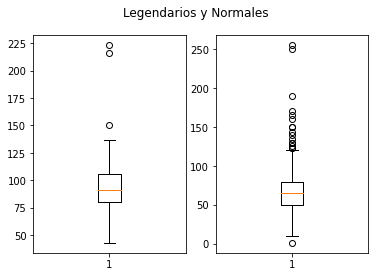

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
ax1.boxplot(Legendarios['hp'])
ax2.boxplot(Normals['hp'])



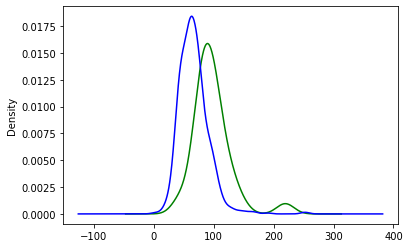

In [146]:

Legendarios.hp.plot.density(color='green')
Normals.hp.plot.density(color='blue')